# Decision Tree

### Predict MPG of Car  (Miles Per Gallon)


In [9]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
# Load Dataset
df = pd.read_csv('cars.csv')
df.head()

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [13]:
df.columns

Index(['Model ', 'MPG', 'Cylinder', 'Disp', 'HP', 'Drat', 'Wt', 'Qsec', 'VS',
       'AM', 'Gear', 'Carb'],
      dtype='object')

In [123]:
df.drop('Model ', axis=1, inplace=True)

In [17]:
df.head()

,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [19]:
df.isnull().sum()

MPG         0
Cylinder    0
Disp        0
HP          0
Drat        0
Wt          0
Qsec        0
VS          0
AM          0
Gear        0
Carb        0
dtype: int64

In [21]:
df.describe()

,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.403125,147.531250,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.788090,70.012434,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,197.000000,118.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,201.250000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


### EDA

In [25]:
# EDA
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Data types and structure
print("\nData types:\n", df.dtypes)

# Summary statistics
print("\nSummary statistics:\n", df.describe())

Missing values per column:
 MPG         0
Cylinder    0
Disp        0
HP          0
Drat        0
Wt          0
Qsec        0
VS          0
AM          0
Gear        0
Carb        0
dtype: int64

Data types:
 MPG         float64
Cylinder      int64
Disp        float64
HP            int64
Drat        float64
Wt          float64
Qsec        float64
VS            int64
AM            int64
Gear          int64
Carb          int64
dtype: object

Summary statistics:
              MPG   Cylinder        Disp          HP       Drat         Wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.403125  147.531250   3.596563   3.217250   
std     6.026948   1.785922  123.788090   70.012434   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  197.000000  118.000000   3.695000   3.325000

### Vsualization

### Histograms for Numerical Variables

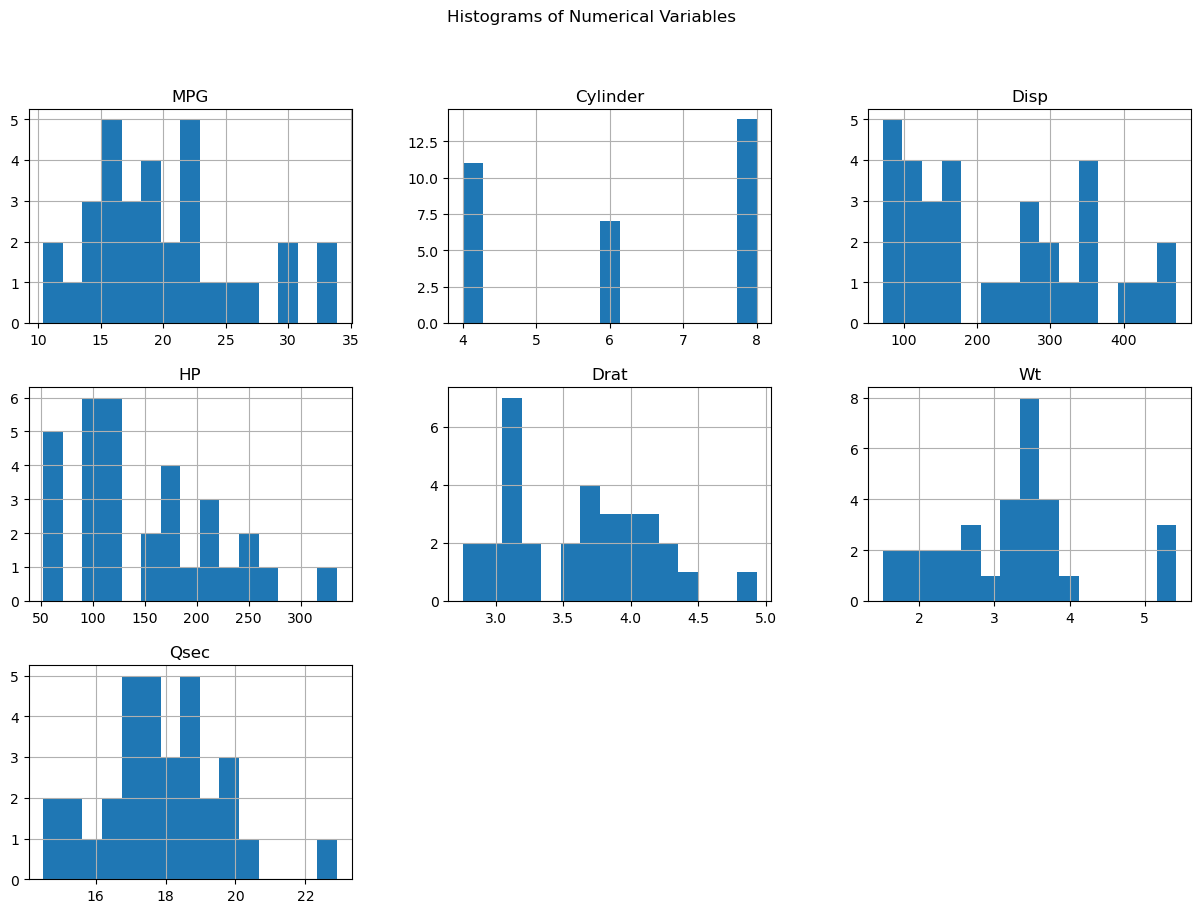

In [29]:
# List of numerical columns
numerical_cols = ['MPG', 'Cylinder', 'Disp', 'HP', 'Drat', 'Wt', 'Qsec']

# Plot histograms
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Histograms of Numerical Variables")
plt.show()

#### Boxplots for Outliers

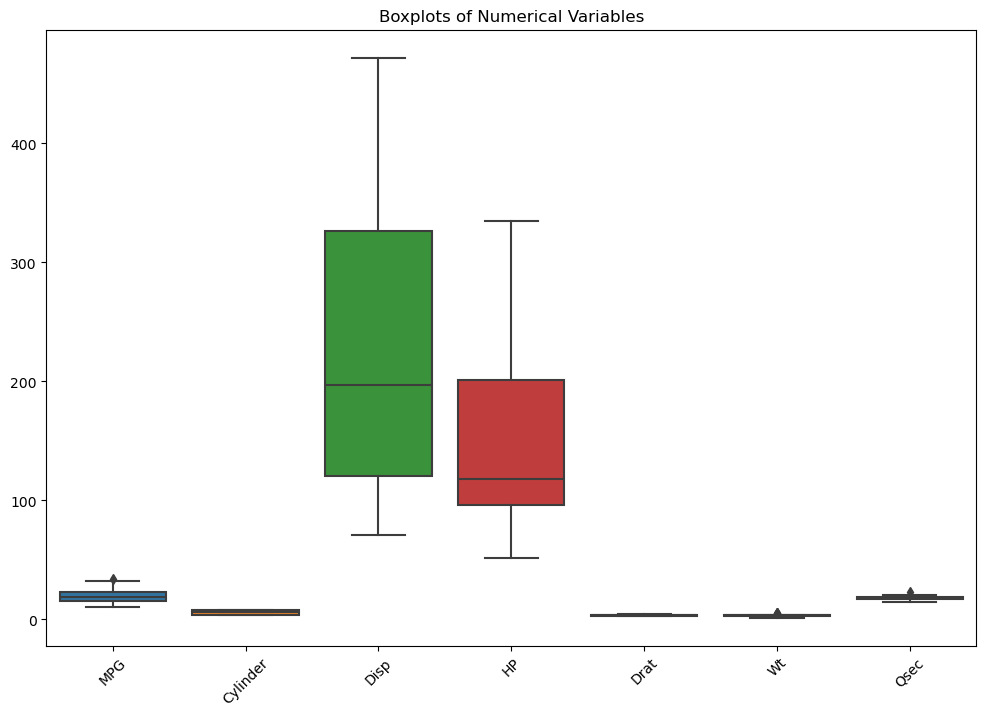

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplots of Numerical Variables")
plt.xticks(rotation=45)
plt.show()

### Counts for Categorical Variables

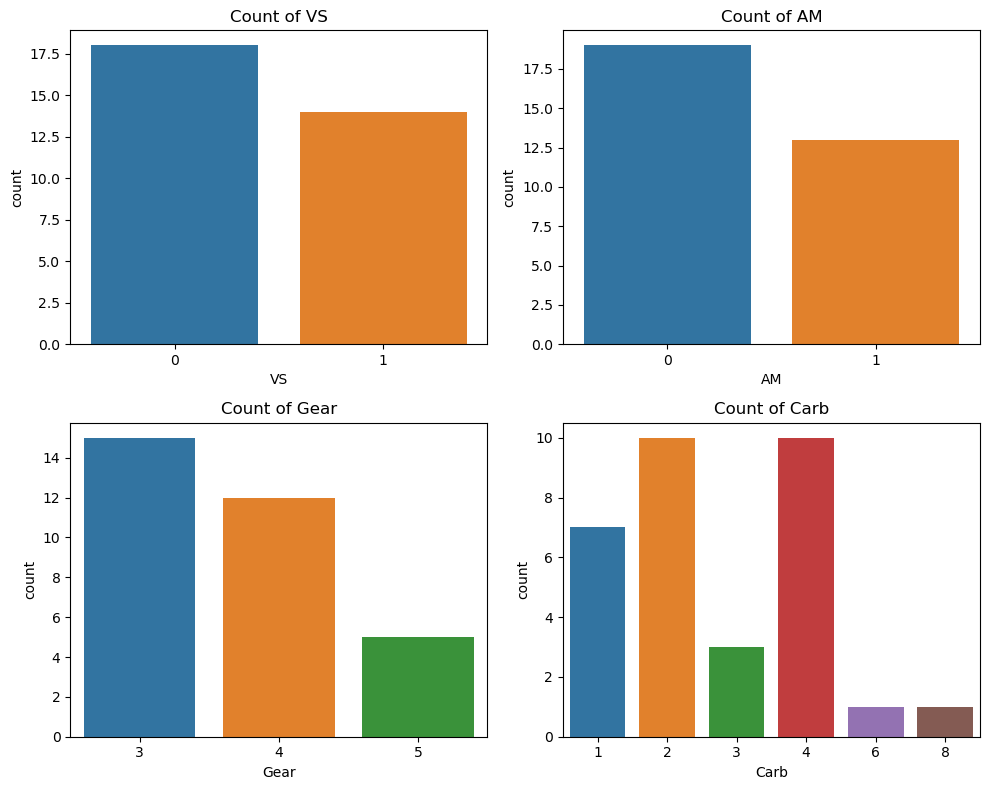

In [35]:
# Counts for Categorical Variables
categorical_cols = ['VS', 'AM', 'Gear', 'Carb']

# Bar plots for each categorical column
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Count of {col}')
plt.tight_layout()
plt.show()

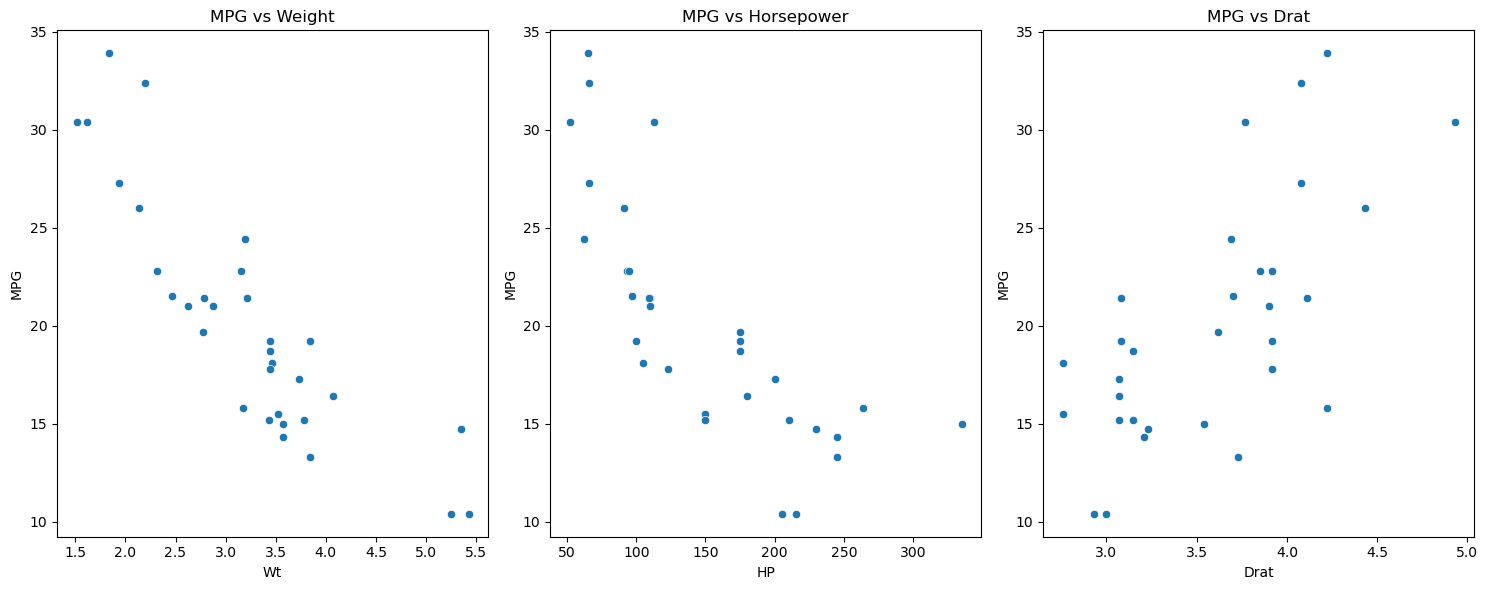

In [38]:
# Scatter Plots
plt.figure(figsize=(15, 6))

# MPG vs Wt
plt.subplot(1, 3, 1)
sns.scatterplot(x='Wt', y='MPG', data=df)
plt.title('MPG vs Weight')

# HP vs MPG
plt.subplot(1, 3, 2)
sns.scatterplot(x='HP', y='MPG', data=df)
plt.title('MPG vs Horsepower')

# Drat vs MPG
plt.subplot(1, 3, 3)
sns.scatterplot(x='Drat', y='MPG', data=df)
plt.title('MPG vs Drat')

plt.tight_layout()
plt.show()

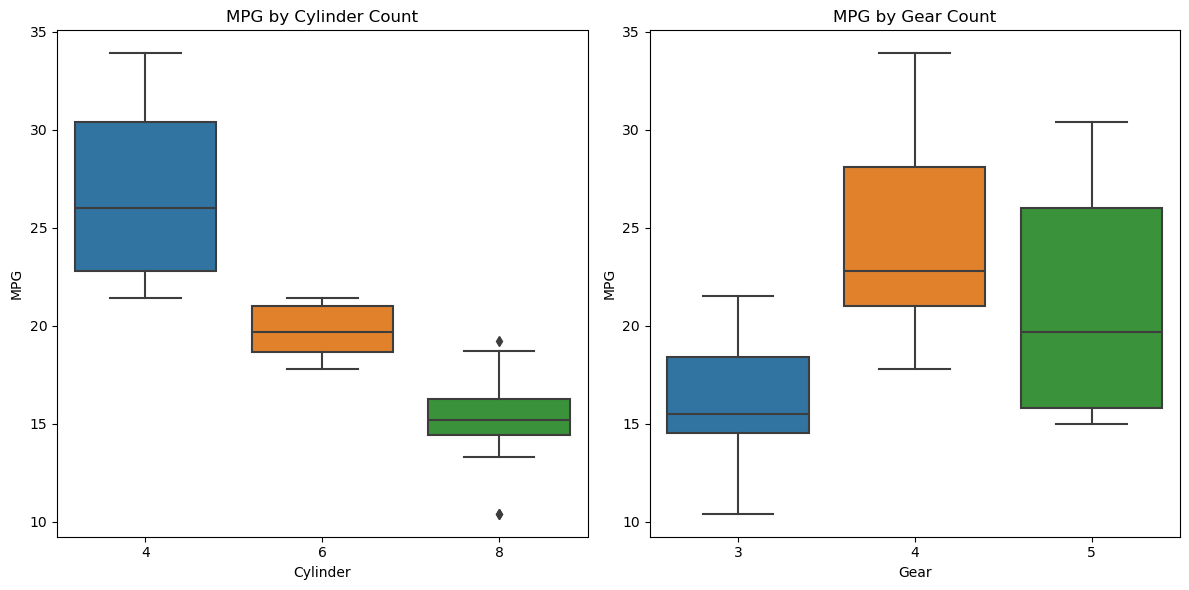

In [40]:
# Boxplots by Categorical Variables
plt.figure(figsize=(12, 6))

# MPG by Cylinder count
plt.subplot(1, 2, 1)
sns.boxplot(x='Cylinder', y='MPG', data=df)
plt.title('MPG by Cylinder Count')

# MPG by Gear count
plt.subplot(1, 2, 2)
sns.boxplot(x='Gear', y='MPG', data=df)
plt.title('MPG by Gear Count')

plt.tight_layout()
plt.show()

### Correlation Matrix Heatmap

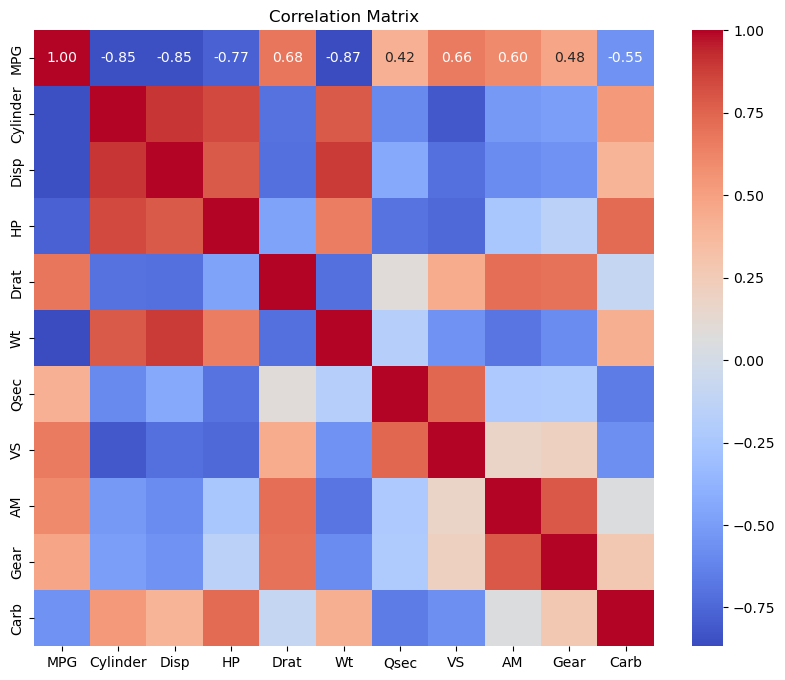

In [43]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

C:\Users\Antonis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Antonis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Antonis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Antonis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

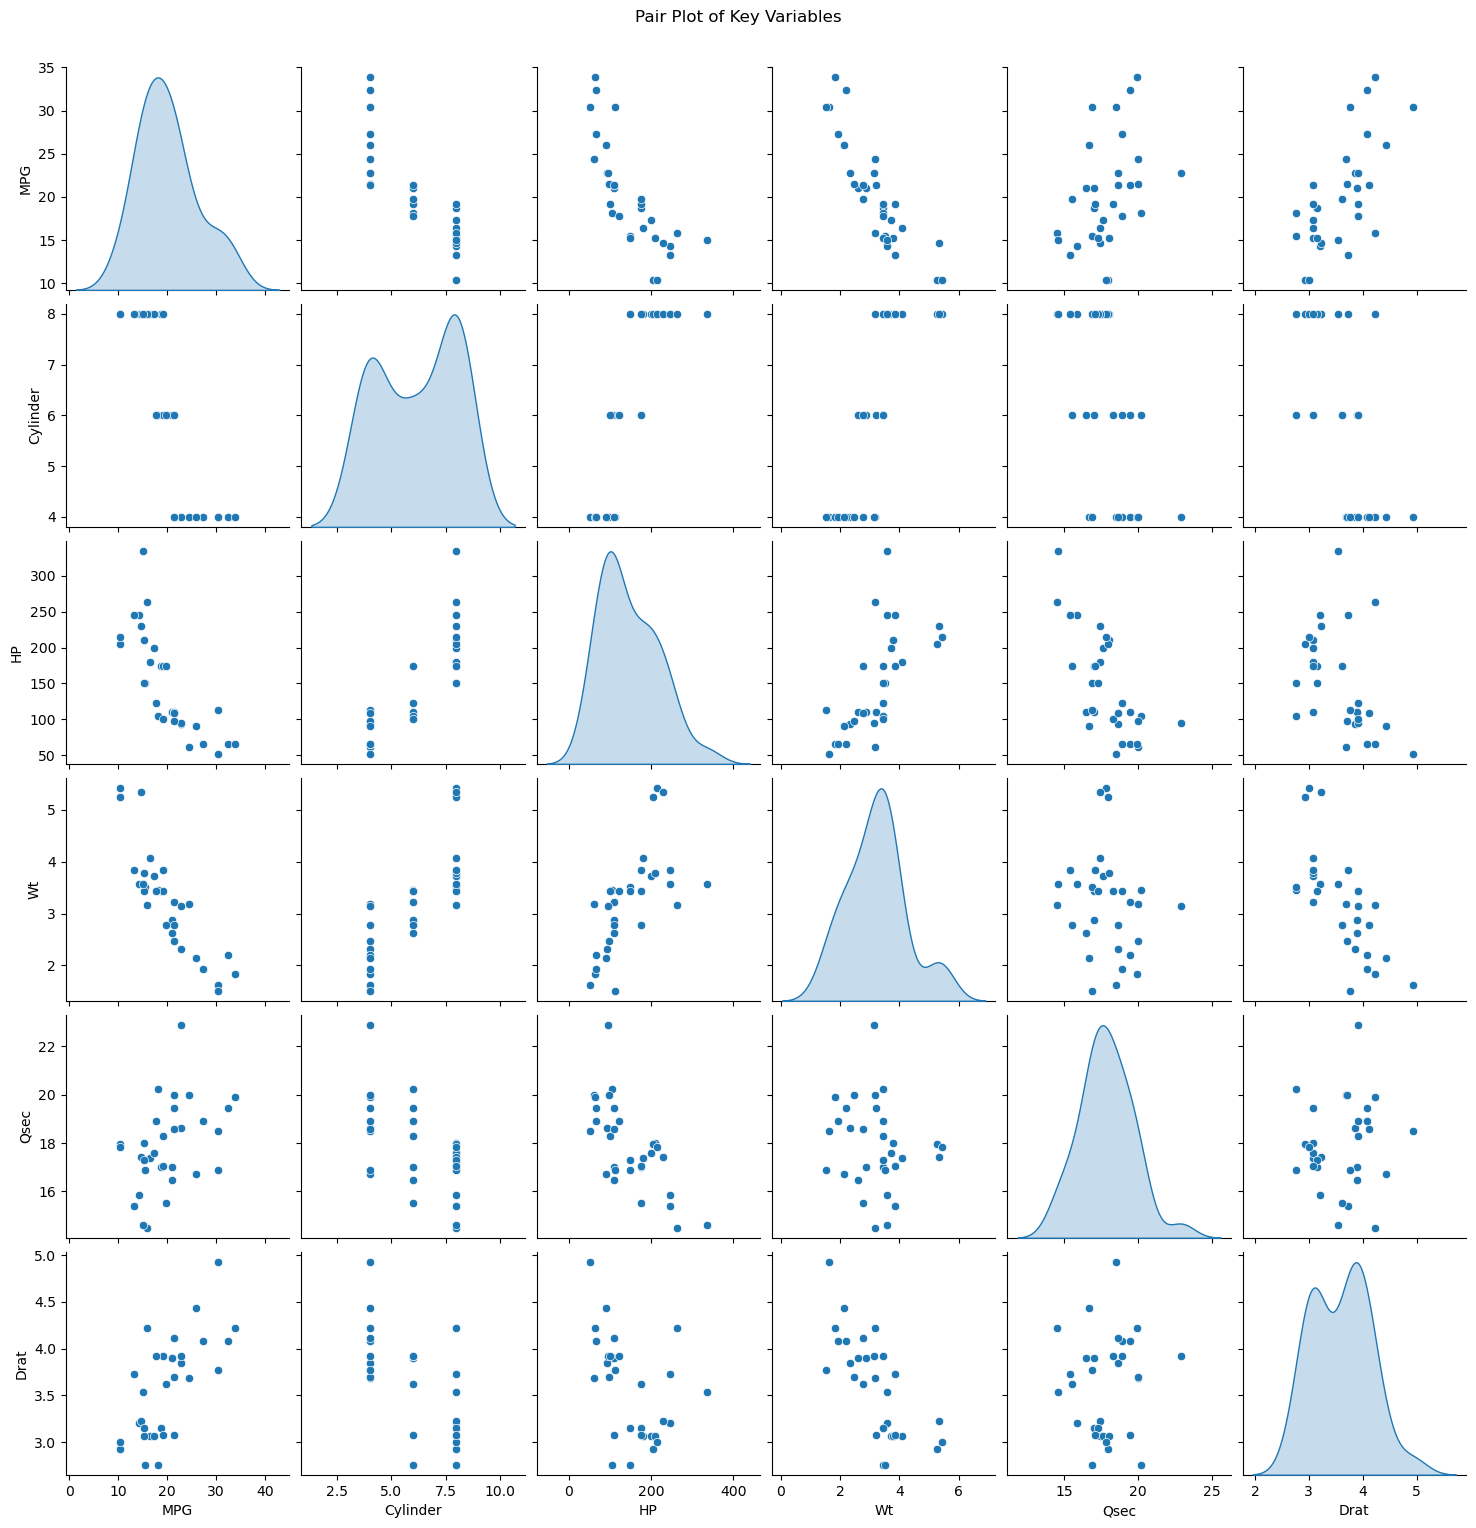

In [45]:
# Pair Plot
sns.pairplot(df[['MPG', 'Cylinder', 'HP', 'Wt', 'Qsec', 'Drat']], diag_kind='kde')
plt.suptitle("Pair Plot of Key Variables", y=1.02)
plt.show()

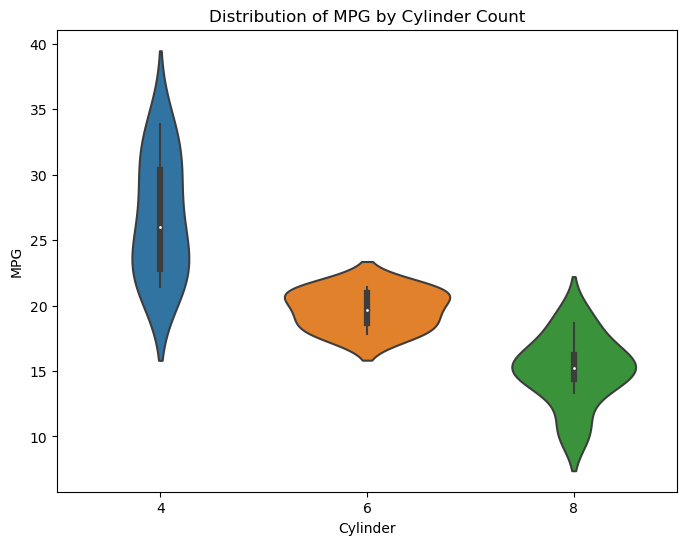

In [49]:
# Violin Plot for MPG by Cylinder
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cylinder', y='MPG', data=df)
plt.title("Distribution of MPG by Cylinder Count")
plt.show()

In [125]:
# Feature Engineering (Optional)
# Create new features
df['Power_to_Weight'] = df['HP'] / df['Wt']
df['Acceleration_per_Weight'] = df['Qsec'] / df['Wt']

# Examine the new features
print(df[['Power_to_Weight', 'Acceleration_per_Weight']].describe())

       Power_to_Weight  Acceleration_per_Weight
count        32.000000                32.000000
mean         45.541298                 6.150775
std          16.611989                 2.288430
min          19.435737                 3.259121
25%          35.120412                 4.539843
50%          41.035470                 5.544927
75%          51.558896                 7.403316
max          93.837535                11.467492


### Split Data

In [131]:
# Split Data
X = df.drop(['MPG','Power_to_Weight','Acceleration_per_Weight'], axis=1) # Features
y = df['MPG']  # Label

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train a linear regression model

In [137]:
# Train a linear regression model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

### Train Decision tree Regression Model

In [139]:
# Train Decision tree Regression Model
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

### Make Prediction

In [141]:
# Make Prediction
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

### Evaluate the Linear Regression Model

In [143]:
# Evaluate the Linear Regression Model
from sklearn.metrics import mean_squared_error, r2_score
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

In [145]:
print('Linear Regression Model mean_squared_error = ' + str(lr_mse)) 
print('Linear Regression Model r2_score = ' + str(lr_r2)) 

Linear Regression Model mean_squared_error = 10.312940963404726
Linear Regression Model r2_score = 0.7420738318275479


### Evaluate the Decsion Tree Model

In [147]:
# Evaluate the Decsion Tree Model
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

In [149]:
print('Decsion Tree Model r2_score = ' + str(dt_r2)) 

Decsion Tree Model r2_score = 0.838542889517257


### coefficients of linear regression

In [151]:
# Print the coefficients of linear regression
print("Linear Regression Coefficients:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"{feature}: {coef}")

Linear Regression Coefficients:
Cylinder: -0.41906032182739633
Disp: 0.015784764345303067
HP: -0.007105965034392371
Drat: 0.9953640129321312
Wt: -4.746651919519363
Qsec: 1.8714988926198264
VS: -2.0483501451577473
AM: 1.0712462225470272
Gear: 1.3543083870372423
Carb: 0.09786995963543967


### Feature importance in Decision tree model

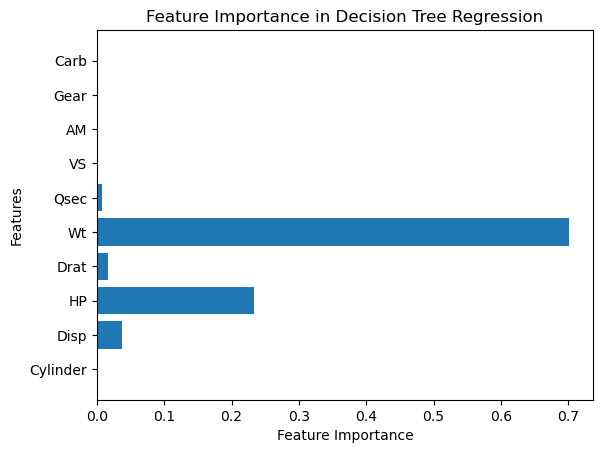

In [153]:
# Plot the Feature importance in Decision tree model
feature_importance = dt_model.feature_importances_
plt.barh(X.columns, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree Regression")
plt.show()

#### Visualize the Decision tree

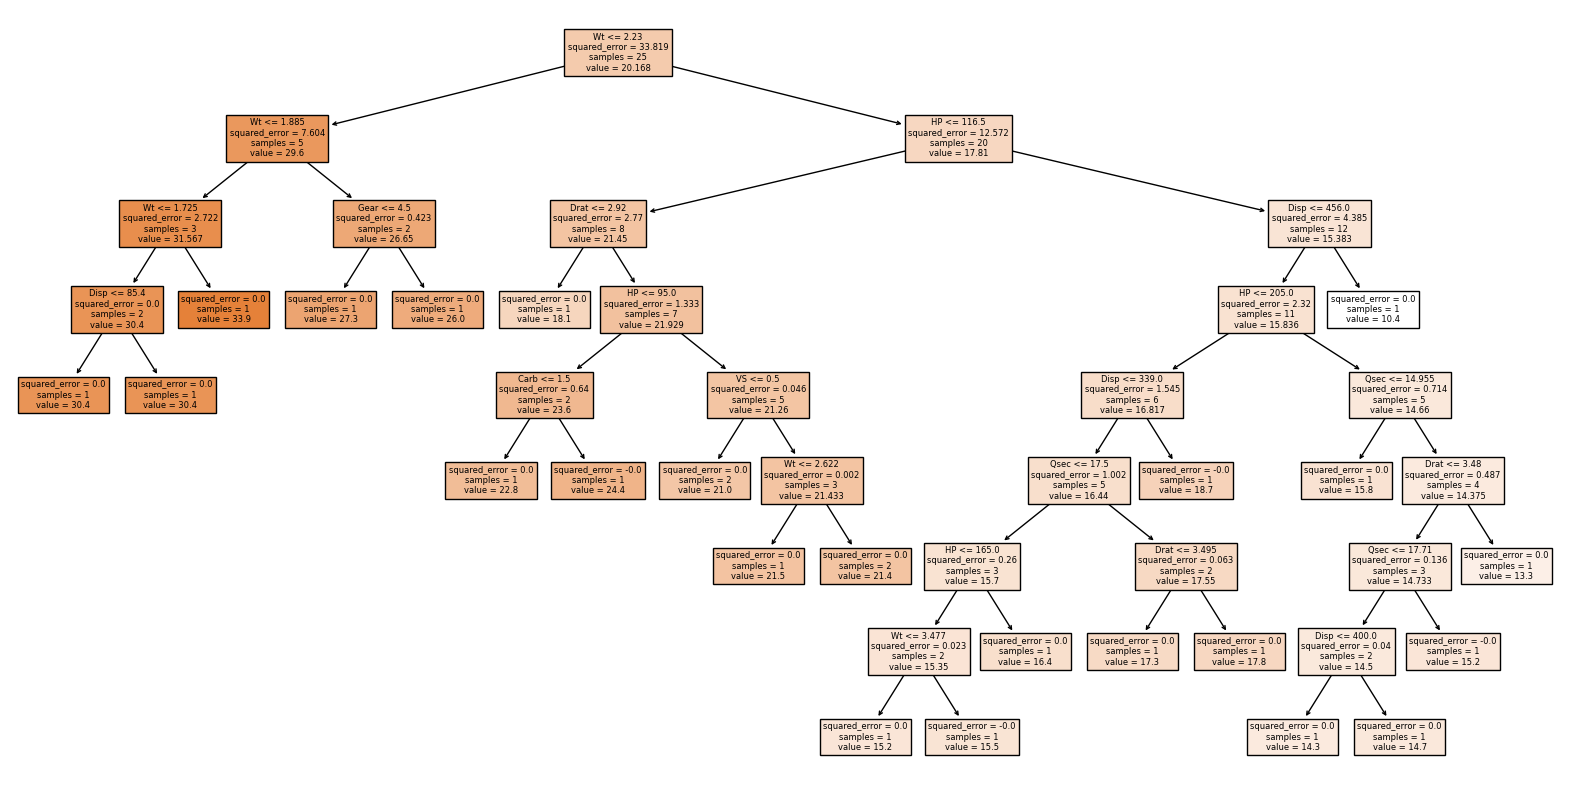

In [156]:
# Visualize the Decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.show()

### Tune Hyperparameters with GridSearchCV

In [201]:
# Grid Search Cv
from sklearn.model_selection import GridSearchCV
# Hyperparameter Tunning
param_grid = {
    # 'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 10, 20, 30,40,50,100,500],
    'min_samples_split': [2, 5, 10,20,40,60,100,200],
    'min_samples_leaf': [1, 2, 4,10,20,30,50,100]
}

In [203]:
grid_search=GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

In [205]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50, 100, 500],
                         'min_samples_leaf': [1, 2, 4, 10, 20, 30, 50, 100],
                         'min_samples_split': [2, 5, 10, 20, 40, 60, 100, 200]},
             scoring='neg_mean_squared_error')

In [224]:
# Best parameters from GridsearchCV
best_params = grid_search.best_params_

In [226]:
best_params

{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [211]:

print("Best parameters from GridsearchCV: " + str(best_params))

Best parameters from GridsearchCV: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


### Train the Decision tree Regression Model with the best parameters 

In [181]:
# Train Decision tree Regression Model
from sklearn.tree import DecisionTreeRegressor
#dt_model = DecisionTreeRegressor(criterion='absolute_error', max_depth=20, min_samples_leaf=2, min_samples_split=5)
dt_model = DecisionTreeRegressor(max_depth=No, min_samples_leaf=2, min_samples_split=5)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=20,
                      min_samples_leaf=2, min_samples_split=5)

In [187]:
### Make Prediction

In [189]:
# Make Prediction
y_pred_dt = dt_model.predict(X_test)

### Evaluate the Decsion Tree Model with the best parameters

In [228]:
# Evaluate the Decsion Tree Model
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

In [230]:
dt_r2

0.8678219024804656

In [232]:
print('Decsion Tree Model r2_score (with the best parameters) = ' + str(dt_r2)) 

Decsion Tree Model r2_score (with the best parameters) = 0.8678219024804656


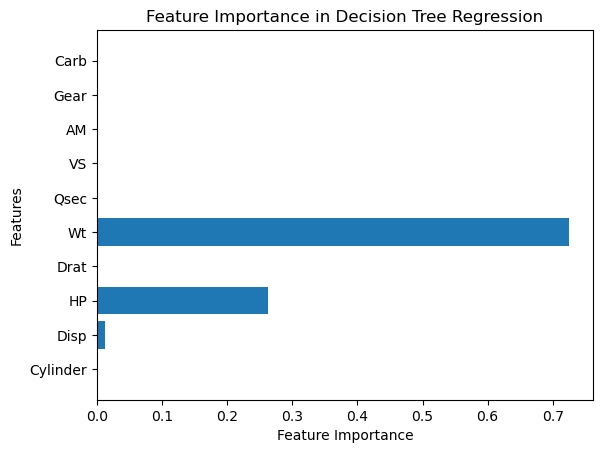

In [234]:
# Plot the Feature importance in Decision tree model
feature_importance = dt_model.feature_importances_
plt.barh(X.columns, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree Regression")
plt.show()

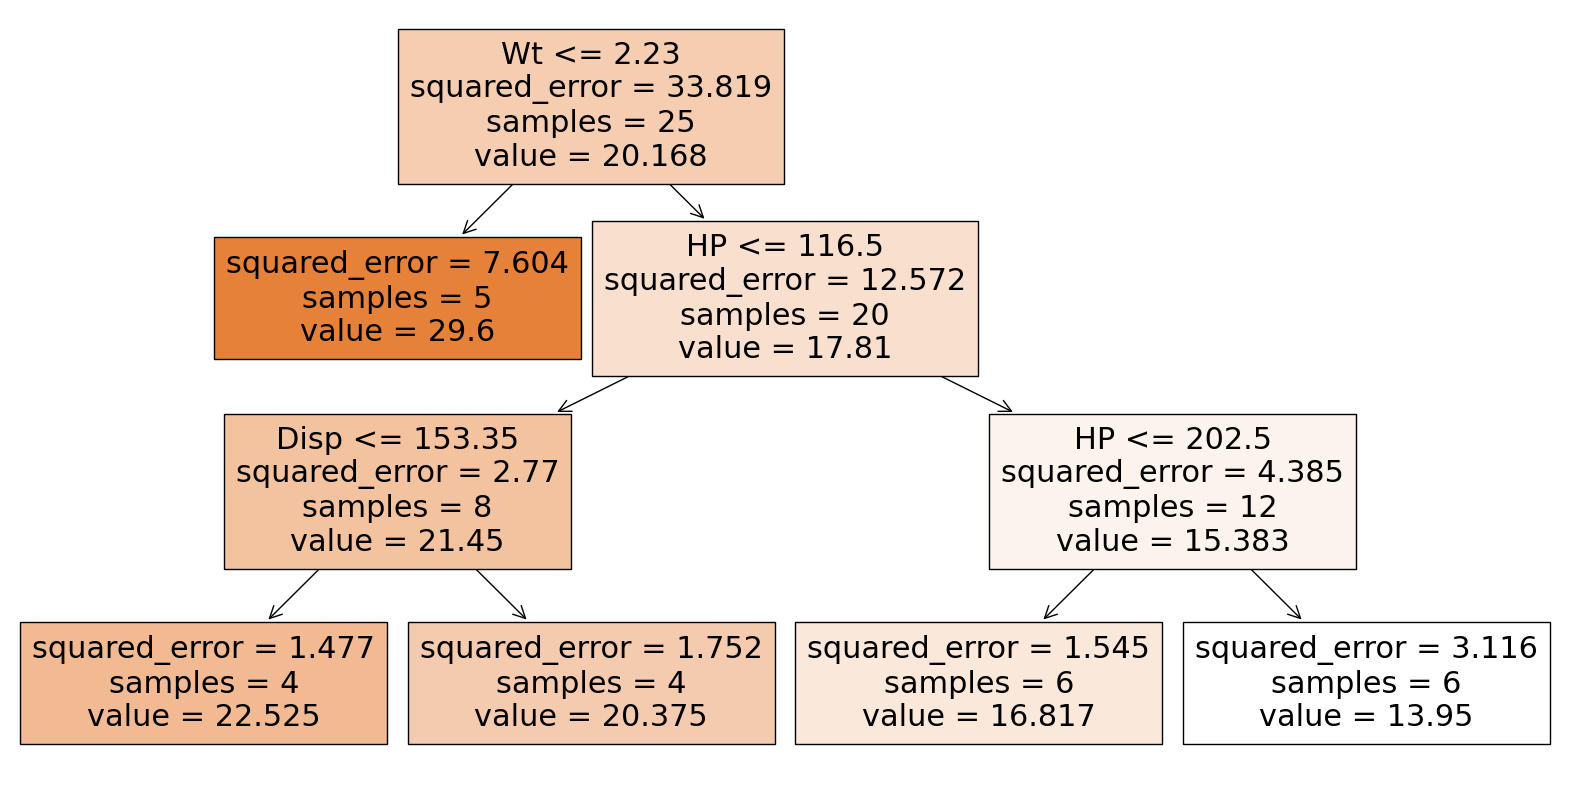

In [236]:
# Visualize the Decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.show()

In [238]:
y_pred_dt

array([16.81666667, 13.95      , 16.81666667, 29.6       , 22.525     ,
       20.375     , 13.95      ])

In [280]:
### TODO - do a test 
# y_pred_a_test = dt_model.predict([{'Cylinder':4,	'Disp': 79.0,'HP':66,'Drat':4.08,'Wt':1.935,'Qsec':	18.90,'VS':	1,'AM':	1,'Gear':4,	'Carb':	1 }])
# y_pred_a_test